In [1]:
import pandas as pd

# Data Pre-Processing

In [2]:
espam = pd.read_csv("combined_data.csv")
espam

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [3]:
espam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
espam.duplicated().sum()

0

In [5]:
espam.shape

(83448, 2)

## EDA(Explority Data Analysis)

In [6]:
espam["label"].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt 

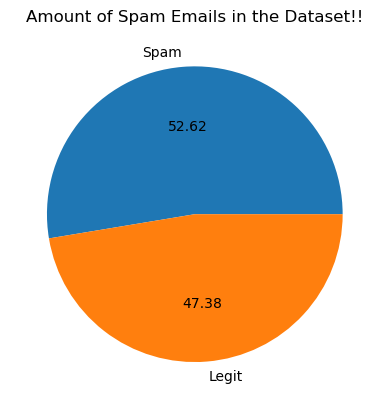

In [ ]:
plt.pie(espam["label"].value_counts(),labels=["Spam","Legit"], autopct = "%0.2f")
plt.title("Amount of Spam Emails in this Dataset!!")
plt.show()

In [9]:
import nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ak212\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# number of characters in each email
espam["num_characters"] = espam["text"].apply(len)
espam["num_characters"]

0         148
1         808
2        2235
3         592
4        1362
         ... 
83443    2589
83444     616
83445     534
83446    2113
83447     223
Name: num_characters, Length: 83448, dtype: int64

In [12]:
espam.head()

,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [13]:
# number of words in each email
espam["num_words"] = espam["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
# number of sentences in each email
espam["num_sentences"] = espam["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
espam

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1
...,...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,344,1
83444,1,now you can order software on cd or download i...,616,118,25
83445,1,dear valued member canadianpharmacy provides a...,534,76,1
83446,0,subscribe change profile contact us long term ...,2113,277,1


In [16]:
espam[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000
mean,1662.952725,285.022733,7.250060
std,4178.578068,727.032941,34.832317
min,1.000000,1.000000,1.000000
25%,449.000000,80.000000,1.000000
50%,879.000000,154.000000,1.000000
75%,1861.000000,314.000000,5.000000
max,598705.000000,101984.000000,3093.000000


In [17]:
espam[espam['num_characters']== 1]

,label,text,num_characters,num_words,num_sentences
6102,1,l,1,1,1
35448,1,>,1,1,1
57326,0,),1,1,1
81133,1,a,1,1,1


In [18]:
#legit
espam[espam['label']== 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [19]:
#spam
espam[espam['label']== 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


In [20]:
import seaborn as sns

(1.0, 12500.0)

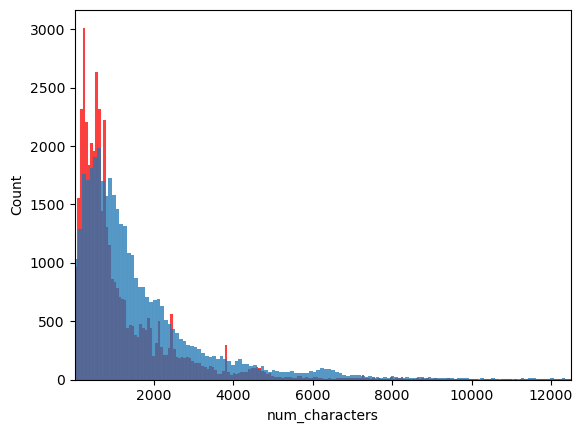

In [21]:
fig, ax = plt.subplots()
sns.histplot(espam[espam['label']== 1]["num_characters"], ax=ax, color ='red')
sns.histplot(espam[espam['label']== 0]["num_characters"], ax=ax)
ax.set_xlim(1,12500)

(1.0, 2500.0)

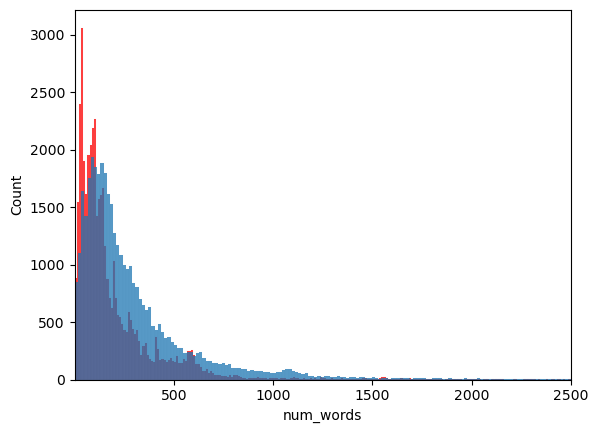

In [22]:
fig, ax = plt.subplots()
sns.histplot(espam[espam['label']== 1]["num_words"], ax=ax, color ='red')
sns.histplot(espam[espam['label']== 0]["num_words"], ax=ax)
ax.set_xlim(1,2500)

C:\Users\ak212\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


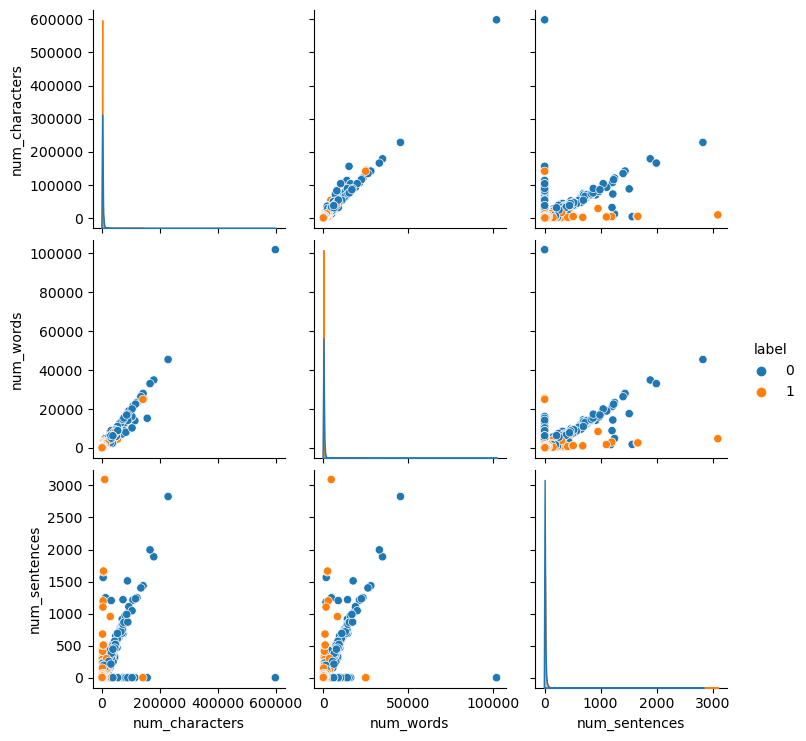

In [23]:
sns.pairplot(espam, hue ="label")

<Axes: >

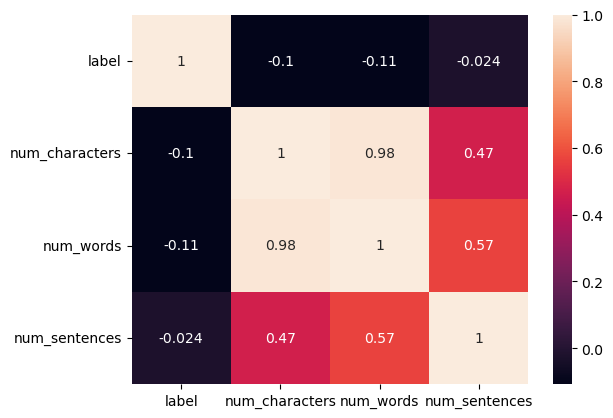

In [24]:
# Drop the non-numeric columns
espam_numeric = espam.drop(columns='text')

sns.heatmap(espam_numeric.corr(),annot = True)

# Text Preprocessing

- Lower Case
- Tokenization

- Removing stop words and punctuation
- Stemming


In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ak212\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
         y.append(ps.stem(i))
       
    
    
    return " ".join(y)

In [32]:
text_transform('Hello lovely how are you what you do @#$% ?>')

'hello love'

In [ ]:
espam['text_transform'] = espam['text'].apply(text_transform)

In [ ]:
espam